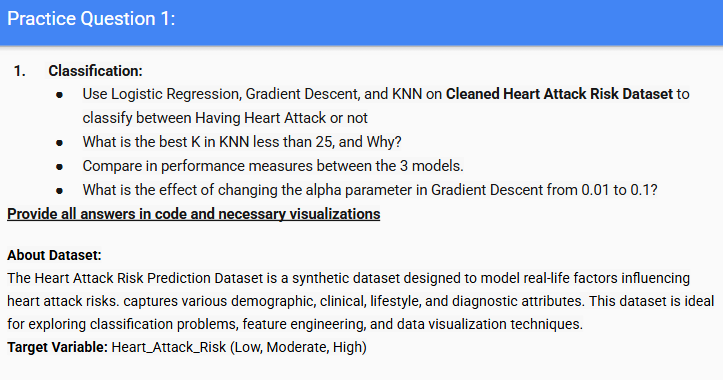

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset 1: Heart Attack

In [ ]:
data = pd.read_csv('/content/Cleaned_Heart_Attack_Risk_Dataset.csv')

In [ ]:
data

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,...,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk,Hypertension_Diabetes,BMI_Age
0,69,0,1,0,2,34.61,1,0,152.1,171,...,2,2,2,0,1,0,114,1,1,2388.09
1,32,1,0,0,2,22.75,0,0,166.8,126,...,1,0,1,0,2,0,173,2,0,728.00
2,89,1,0,1,2,35.32,0,0,272.3,123,...,1,3,2,0,2,0,109,1,0,3143.48
3,78,1,0,1,2,18.23,1,0,237.7,144,...,1,3,0,1,0,0,129,1,1,1421.94
4,38,0,1,0,2,19.82,0,0,207.7,123,...,0,0,2,0,2,0,124,2,0,753.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,1,0,0,1,39.93,0,0,269.9,171,...,0,3,2,0,2,0,122,0,0,838.53
49996,35,0,0,0,1,18.10,0,0,235.8,146,...,2,2,0,1,2,0,121,2,0,633.50
49997,46,1,0,1,0,21.42,0,0,172.8,146,...,1,3,0,0,0,0,125,1,0,985.32
49998,56,1,0,1,1,29.93,0,0,244.1,151,...,1,0,2,0,1,0,149,2,0,1676.08


In [ ]:
x_label= data.drop('Heart_Attack_Risk', axis=1)
y_label = data['Heart_Attack_Risk']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_predicted = logistic.predict(X_test)

## Evaluate

In [ ]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_predicted))
print("Accuracy:", accuracy_score(y_test, y_predicted))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000

Accuracy: 0.5083


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Gradient Decent

## Alpha = 0.01

In [ ]:
sgd1= SGDClassifier(loss='log_loss', alpha=0.01, random_state=42)
sgd1.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=42)

In [ ]:
y_predicted_sgd = sgd1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted_sgd))
print("Accuracy:", accuracy_score(y_test, y_predicted_sgd))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000

Accuracy: 0.5083


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Alpha = 0.1

In [ ]:
sgd2 = SGDClassifier(loss='log_loss', alpha=0.1, random_state=42)
sgd2.fit(X_train, y_train)


SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [ ]:
y_predicted_sgd2 = sgd2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predicted_sgd2))
print("Accuracy:", accuracy_score(y_test, y_predicted_sgd2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000

Accuracy: 0.5083


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
k_values = range(1, 25)
acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predicted_knn = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_predicted_knn))

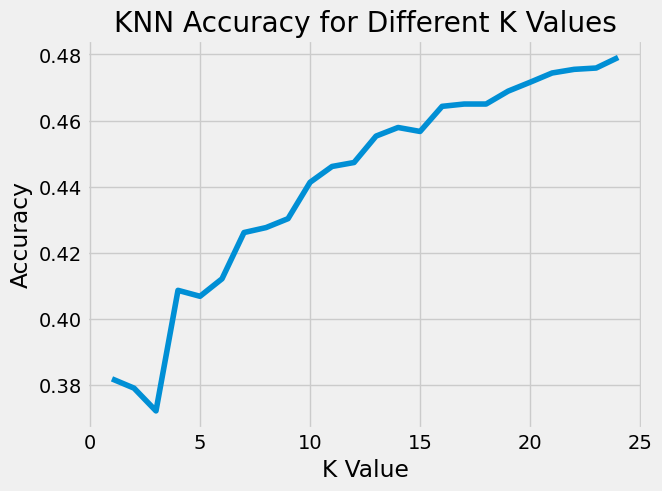

In [ ]:
plt.plot(k_values, acc)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()


In [ ]:
best_k = k_values[acc.index(max(acc))]
print(f"Best K value: {best_k}")

Best K value: 24


In [ ]:
# Train KNN with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
y_pred_knn_best = knn_best.predict(X_test)

In [ ]:
# Evaluate the model
print(f"KNN (K={best_k}) Performance:")
print(classification_report(y_test, y_pred_knn_best))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))

KNN (K=24) Performance:
              precision    recall  f1-score   support

           0       0.22      0.03      0.06      1987
           1       0.51      0.87      0.64      5083
           2       0.28      0.10      0.14      2930

    accuracy                           0.48     10000
   macro avg       0.34      0.33      0.28     10000
weighted avg       0.39      0.48      0.38     10000

Accuracy: 0.4791


#Comparison

## Between 3 Models

In [ ]:
# Compare accuracies
print("Model Accuracies:")
print(f"Logistic Regression: {accuracy_score(y_test, y_predicted)}")
print(f"Gradient Descent (alpha=0.01): {accuracy_score(y_test, y_predicted_sgd2)}")
print(f"Gradient Descent (alpha=0.1): {accuracy_score(y_test, y_predicted_sgd2)}")
print(f"KNN (K={best_k}): {accuracy_score(y_test, y_pred_knn_best)}")

Model Accuracies:
Logistic Regression: 0.5083
Gradient Descent (alpha=0.01): 0.5083
Gradient Descent (alpha=0.1): 0.5083
KNN (K=24): 0.4791


## Between alpha = 0.1 and 0.01

In [ ]:

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 40)

evaluate_model(y_test, y_predicted_sgd, "SGDClassifier (alpha=0.01)")
evaluate_model(y_test, y_predicted_sgd2, "SGDClassifier (alpha=0.1)")

Model: SGDClassifier (alpha=0.01)
Accuracy: 0.5083
Precision: 0.2584
Recall: 0.5083
F1-Score: 0.3426
----------------------------------------
Model: SGDClassifier (alpha=0.1)
Accuracy: 0.5083
Precision: 0.2584
Recall: 0.5083
F1-Score: 0.3426
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


There is no difference based on the accuracy scores



---



# Dataset 2: Cleaned Cancer Regression

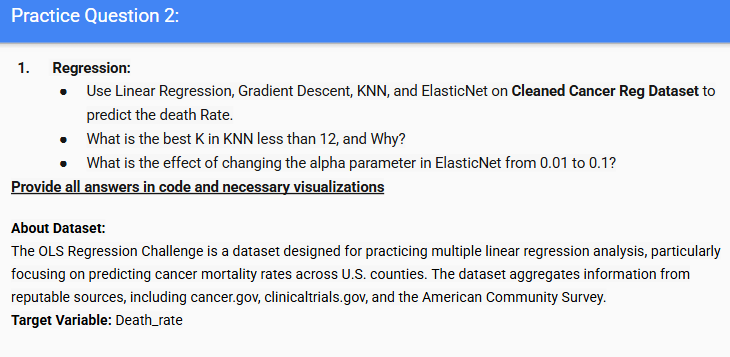

In [ ]:

data = pd.read_csv("/content/Cleaned_Cancer_Reg.csv")
X = data.drop(columns=["TARGET_deathRate"])
y = data["TARGET_deathRate"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)


## Gradient Decent

In [ ]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)


## KNN

In [ ]:
k_values_to_test = range(1, 12)

mse_scores = []

for k in k_values_to_test:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_predictions = knn_model.predict(X_test_scaled)
    current_mse = mean_squared_error(y_test, y_predictions)
    current_r2 = r2_score(y_test, y_predictions)

    mse_scores.append(current_mse)


In [ ]:
best_k_index = mse_scores.index(min(mse_scores))
best_k = k_values_to_test[best_k_index]
best_mse = mse_scores[best_k_index]

print(f"Best K: {best_k}")
print(f"Best MSE: {best_mse:.2f}")

Best K: 11
Best MSE: 409.92


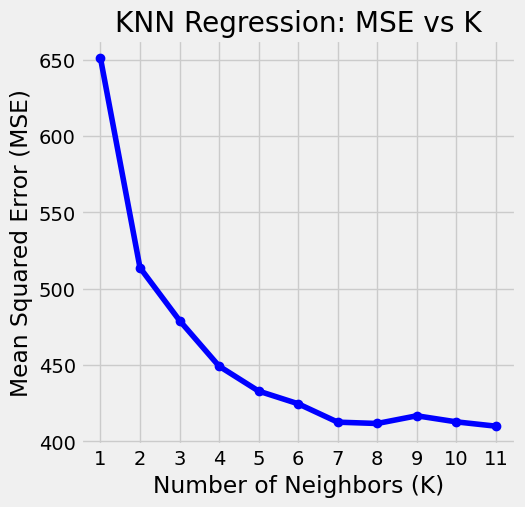

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(k_values, knn_mses, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression: MSE vs K")
plt.xticks(k_values)
plt.grid(True)
plt.show()

*as K is bigger the MSE decrease that's why K= 11 is the best*



## ElasticNet: Compare alpha=0.01 and alpha=0.1


In [ ]:
alphas = [0.01, 0.1]
elastic_mses = []

for alpha in alphas:
    en = ElasticNet(alpha=alpha, random_state=42)
    en.fit(X_train_scaled, y_train)
    y_pred_en = en.predict(X_test_scaled)
    elastic_mses.append(mean_squared_error(y_test, y_pred_en))

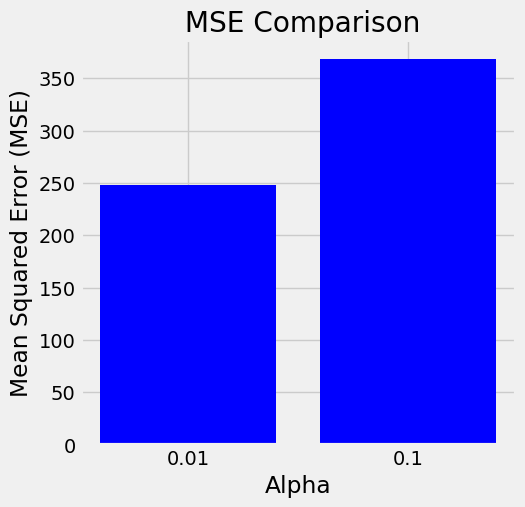

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar([str(alpha) for alpha in alphas], elastic_mses, color='blue')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(" MSE Comparison")
plt.grid(True)
plt.show()

*When aplha increases MSE increases too*